In [32]:
# import necessary packages to view images in directory and get size of images
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from fractions import Fraction
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [15]:
def mcd(a, b):
    if b == 0:
        return a
    return mcd(b, a % b)

def get_aspect_ratio(width, height):
    return Fraction(width, height).limit_denominator()

In [17]:
get_aspect_ratio(1920, 1080)

Fraction(16, 9)

In [20]:
# get all the images in path and create a dataframe with the image name, height, width, aspect ratio and file size
path = 'images/'
files = os.listdir(path)
files = [f for f in files]
df = pd.DataFrame(files, columns=['image'])
df['height'] = df['image'].apply(lambda x: Image.open(path + x).size[1])
df['width'] = df['image'].apply(lambda x: Image.open(path + x).size[0])
df['aspect_ratio'] = df['image'].apply(lambda x: Fraction(Image.open(path + x).size[0]/Image.open(path + x).size[1]).limit_denominator())
df['file_size'] = df['image'].apply(lambda x: os.path.getsize(path + x))

In [21]:
df.head()

,image,height,width,aspect_ratio,file_size
0,e92def6b-84f5-4158-b12e-ca5a95e2f043.jpeg,168,300,25/14,14389
1,2917751c-6df7-4bd9-9db3-d04e69750dd2.jpeg,275,183,183/275,14746
2,cd44e559-6ff2-4162-b023-839d87da637d.jpeg,183,275,275/183,8863
3,cb5ca20b-d352-44e3-8a2f-805cd7962664.jpeg,225,225,1,14495
4,adc3dadb-af31-47e7-9b72-d143b6d7cb5c.jpeg,148,341,341/148,9773


In [11]:
df.describe()

,height,width,file_size
count,16000.000000,16000.000000,1.600000e+04
mean,219.451375,254.668313,1.740784e+04
std,161.837340,191.698595,1.760040e+05
min,88.000000,100.000000,1.421000e+03
25%,183.000000,198.000000,7.965750e+03
50%,194.000000,259.000000,1.000050e+04
75%,233.000000,275.000000,1.229025e+04
max,6000.000000,7599.000000,1.518833e+07


|d|heightd|widthd|file_size|
|---|---|---|---|
|countd|16000.000000d|16000.000000d|1.600000e+04|
|meand|219.451375d|254.668313d|1.740784e+04|
|stdd|161.837340d|191.698595d|1.760040e+05|
|mind|88.000000d|100.000000d|1.421000e+03|
|25%d|183.000000d|198.000000d|7.965750e+03|
|50%d|194.000000d|259.000000d|1.000050e+04|
|75%d|233.000000d|275.000000d|1.229025e+04|
|maxd|6000.000000d|7599.000000d|1.518833e+07|

In [54]:
# show the mode of the widthd and height of the images
print(df['width'].mode())
print(df['height'].mode())

0    275
Name: width, dtype: int64
0    183
Name: height, dtype: int64


In [77]:
mode_height = df['height'].mode()[0]
mode_width = df['width'].mode()[0]

In [71]:
median_width = df['width'].median()
median_height = df['height'].median()

In [78]:
mode_width, mode_height

(275, 183)

In [74]:
median_width, median_height

(259.0, 194.0)

In [11]:
df[df['height'] == 6000]

,image,height,width,aspect_ratio,file_size
9697,d7bafb55-2c09-484c-a8ed-5c3204edf8cb.jpeg,6000,3376,0.562667,1476236


![](all_imgs/d7bafb55-2c09-484c-a8ed-5c3204edf8cb.jpeg)

In [12]:
df[df['height'] == 88]

,image,height,width,aspect_ratio,file_size
13677,c36aa242-2026-4220-b521-d8d130cccbfe.jpeg,88,155,1.761364,3946


![](all_imgs/c36aa242-2026-4220-b521-d8d130cccbfe.jpeg)

/tmp/ipykernel_1500216/1231077071.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[0, 0])
/tmp/ipykernel_1500216/1231077071.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'][df['file_size'] > 1.229025e+04], bins=100,

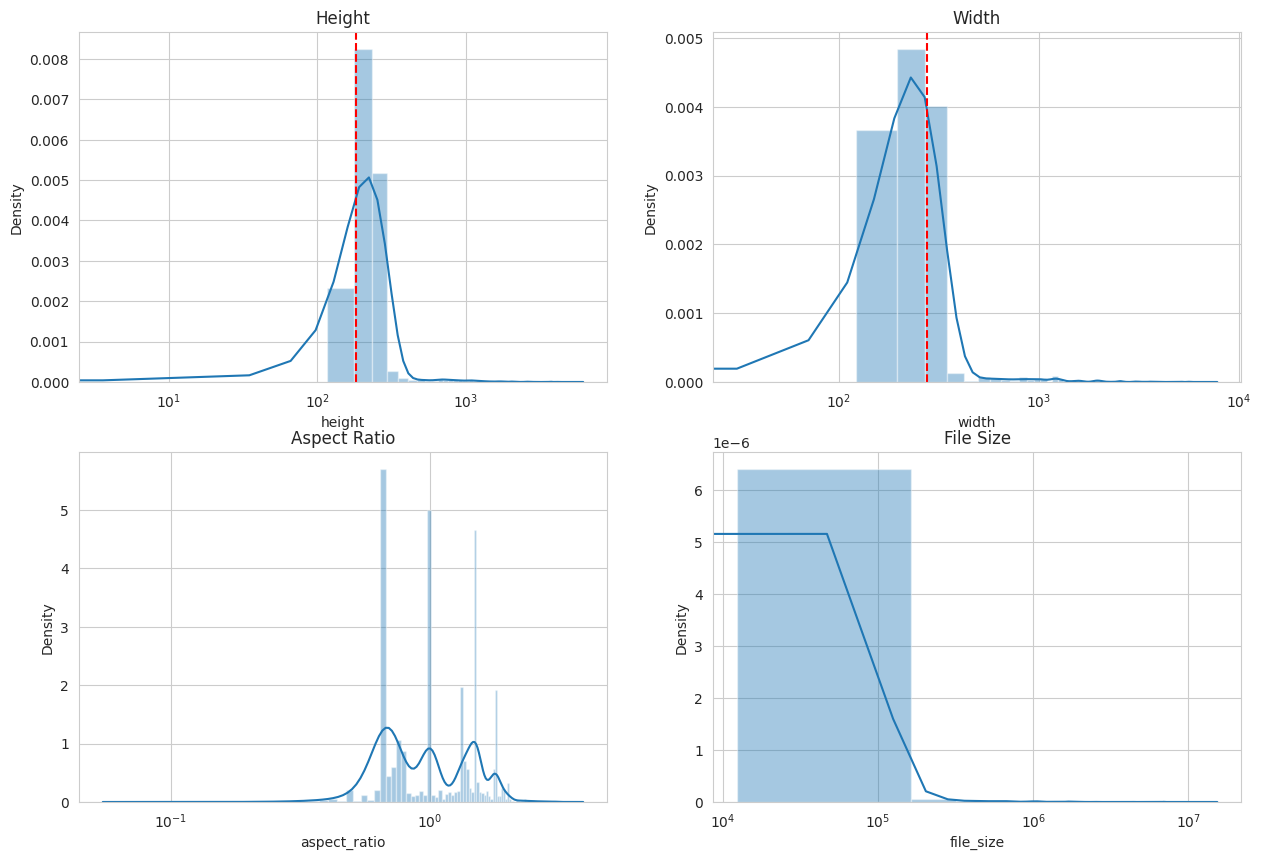

In [82]:
sns.set_style('whitegrid')

# plot the distribution of the height, width, aspect ratio and file size using seaborn
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(df['height'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[0, 0])

# Altura
ax[0, 0].set_title('Height')
# plot horizontal line for mode
ax[0, 0].axvline(mode_height, color='r', linestyle='--')
# log scale for x axis
ax[0, 0].set_xscale('log')

# Anchura
sns.distplot(df['width'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[0, 1])
ax[0, 1].set_title('Width')
# plot horizontal line for mode
ax[0, 1].axvline(mode_width, color='r', linestyle='--')
# log scale for x axis
ax[0, 1].set_xscale('log')

# Relación de aspecto
sns.distplot(df['aspect_ratio'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[1, 0])
ax[1, 0].set_title('Aspect Ratio')
# log scale for x axis
ax[1, 0].set_xscale('log')

# Tamaño del archivo
sns.distplot(df['file_size'][df['file_size'] > 1.229025e+04], bins=100, ax=ax[1, 1])
ax[1, 1].set_title('File Size')
# log scale for x axis
ax[1, 1].set_xscale('log')
plt.show();

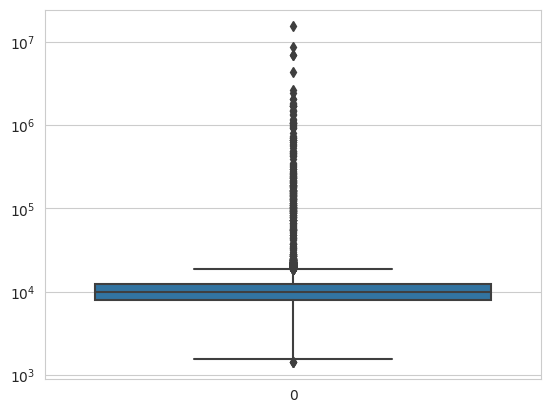

In [21]:
# boxplot of file size, use log scale to see the distribution
sns.boxplot(df['file_size'])
plt.yscale('log')

In [20]:
# show values of the file size on the fourth quartile
df[df['file_size'] > 1.229025e+04].sort_values(by='file_size', ascending=False)

,image,height,width,aspect_ratio,file_size
9346,6271bff0-6c6f-45d1-9847-e66665cb8c20.jpeg,4202,6300,1.499286,15188328
1606,4c8f6c91-b717-47a8-9926-92330c598ba1.jpeg,3744,5616,1.500000,8606543
11380,93b62280-9914-46e6-a77c-b612aa92aac4.jpeg,2160,3840,1.777778,6955403
14469,5423b923-474d-4218-85fb-3447ad76cdd8.jpeg,2500,2000,0.800000,6930048
8542,90fa6387-b4d7-41b3-806c-df4fab45f965.jpeg,5699,7599,1.333392,4369262
...,...,...,...,...,...
10024,a283e486-8d4d-4904-a970-d79c9dab434a.jpeg,203,248,1.221675,12294
14459,4683cbee-f1cd-43d3-bb7b-84b2fdcdc1fe.jpeg,225,225,1.000000,12293
14963,9b80350a-b56b-4181-9254-893beb864209.jpeg,183,275,1.502732,12293
6892,9de8d442-06b1-4d9c-a93e-c8d29b3586a2.jpeg,183,275,1.502732,12292


In [19]:
df.shape

(16000, 5)

---

Table summarizing the **advantages**, **disadvantages**, and **recommended use cases** for the different approaches to **"normalize"** the sizes of the images:

|Approach|Advantages|Disadvantages|Recommended Use Case|
|---|---|---|---|
|Resizing|Simplifies preprocessing, enables use of fixed-size convolutional kernels|Can lose information due to downscaling, distorts aspect ratio|When |a fixed-size input is required, and the original aspect ratio is not important
|Padding|Preserves aspect ratio, useful for images with a lot of empty space|Can increase computation and memory requirements|When the aspect ratio of |the original image is important, and the object of interest is not centered
|Cropping|Preserves aspect ratio, useful for images with a centered object of interest|Can discard important information, may require additional |processing to center the object of interest|When the aspect ratio of the original image is important, and the object of interest is centered
|Rescaling|Preserves aspect ratio, useful for images with a variable size|Can result in loss of detail, may introduce artifacts|When preserving the |relative size of objects in the image is important
|Data Augmentation|Increases variability of dataset, makes model more robust to variations|Can increase computation and memory requirements, may |generate unrealistic images|When the dataset is small or lacks diversity, and increasing the size of the dataset is desirable

It's worth noting that these are **general guidelines**, and the choice of approach depends on the specific characteristics of the images and the task at hand.

In [27]:
# show image as array of pixels
img = mpimg.imread('images/0a0b7578-a72b-4654-9d9d-d622c12aa878.jpeg')
img.shape

(183, 275, 3)

In [38]:
type(img)

numpy.ndarray

In [29]:
# show values of the pixels of each corner of the image
img[0, 0], img[0, 274], img[182, 0], img[182, 274]

(array([34, 39, 45], dtype=uint8),
 array([26, 39, 45], dtype=uint8),
 array([ 8,  8, 10], dtype=uint8),
 array([67, 72, 75], dtype=uint8))

### Padding

In [39]:
import numpy as np
from skimage import transform

def pad_image(image, target_size):
    height, width = image.shape[:2]
    ratio = target_size / max(height, width)
    resized_image = transform.resize(image, (int(height * ratio), int(width * ratio)))
    pad_height = target_size - resized_image.shape[0]
    pad_width = target_size - resized_image.shape[1]
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left
    padded_image = np.pad(resized_image, ((pad_top, pad_bottom), (pad_left, pad_right), (0, 0)), mode='constant')
    return padded_image

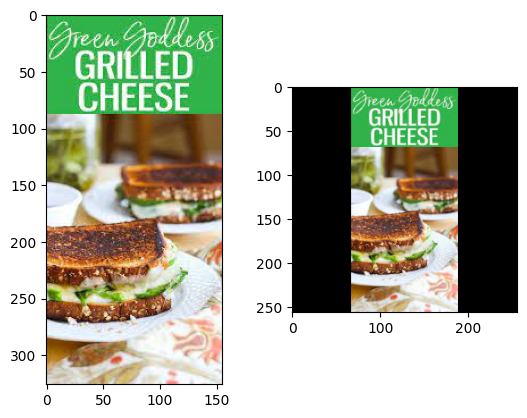

In [40]:
import matplotlib.pyplot as plt

# Load an example image
image = plt.imread('images/0a00d953-9ac7-4648-b06b-f1d601b29ad0.jpeg')

# Pad the image to a target size of 256x256
padded_image = pad_image(image, 256)

# Display the original and padded images side by side
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(padded_image)
plt.show()

### Resizing

In [47]:
def resize_image(image_array, target_size: tuple):
    return transform.resize(image_array, (target_size[0], target_size[1]))

In [61]:
# test image
tst = plt.imread('images/0a00d953-9ac7-4648-b06b-f1d601b29ad0.jpeg')

resized = resize_image(tst, (mode_height,mode_width))

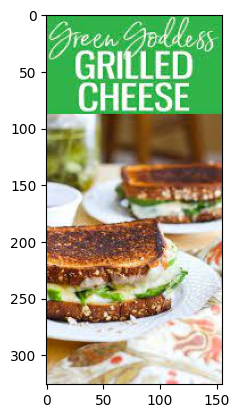

In [59]:
# show tst image
plt.imshow(tst)

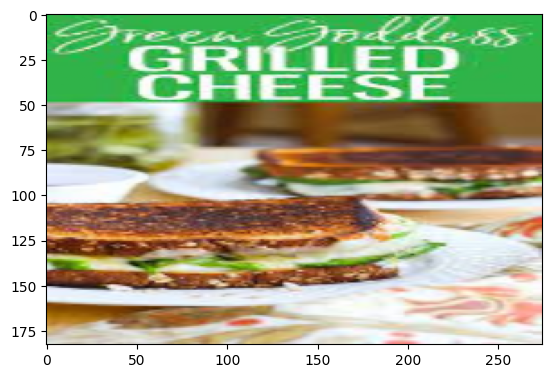

In [62]:
# show resized image
plt.imshow(resized)

In [68]:
# show images where aspect ratio is > 1.5
df[df['aspect_ratio'] < 0.5]

,image,height,width,aspect_ratio,file_size
11,0b28aa5b-142c-4e40-a5e4-d055ea8a1c25.jpeg,367,137,137/367,13192
29,8c428bdc-6341-4f31-b64e-458b406f2523.jpeg,325,155,31/65,17634
116,f145606d-63e2-4451-b1d8-f4424c7c7d49.jpeg,389,129,129/389,13114
160,5e449faf-3c4b-421a-a72c-11e3eb314ad6.jpeg,330,153,51/110,9672
310,d08e21ff-640d-4ceb-9524-4ebd857bdaad.jpeg,367,137,137/367,12770
1884,54d0d920-4d07-4588-bda7-caec986ee076.jpeg,326,155,155/326,13527
2069,19eab086-96dc-48f3-b710-5c039ccf5be6.jpeg,325,155,31/65,14942
2217,f78b41a9-7895-4ecb-bf6d-cec5b0e33ffe.jpeg,338,149,149/338,16945
3344,e486dc3a-1b30-4932-91b1-e1f8a65ce5f9.jpeg,326,155,155/326,20090
3895,a76fbfc8-1f22-421a-9e06-3f8b367bbc21.jpeg,365,138,138/365,18917


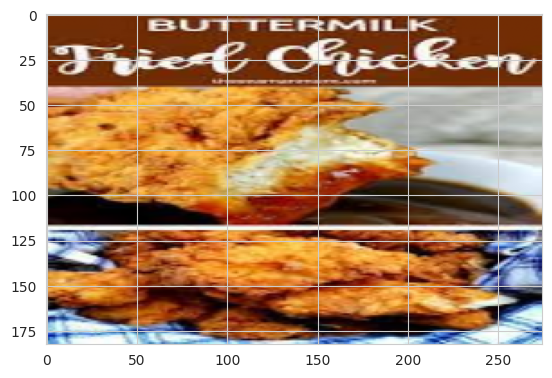

In [69]:
plt.imshow(resize_image(plt.imread('images/54d0d920-4d07-4588-bda7-caec986ee076.jpeg'), (mode_height,mode_width)))

![](images/54d0d920-4d07-4588-bda7-caec986ee076.jpeg)

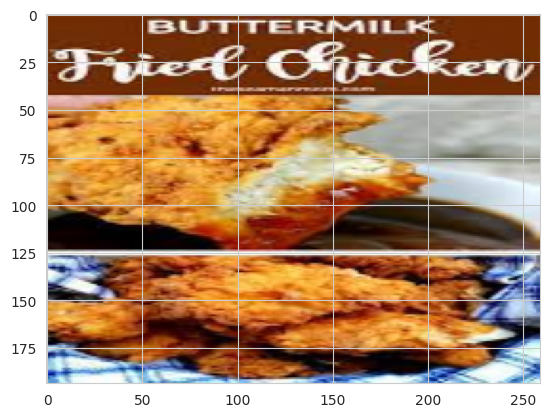

In [73]:
# resize 54d0d920-4d07-4588-bda7-caec986ee076.jpeg to 224x224
img = plt.imread('images/54d0d920-4d07-4588-bda7-caec986ee076.jpeg')
resized = resize_image(img, (median_height,median_width))
plt.imshow(resized)

### Cropping